# About

On this notebook we setup the last and complete steps for the pipeline.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Definitions

REGION = "BuenosAiresCityCenter"

In [3]:
from tqdm import tqdm
tqdm.pandas()

import tools
import settings

settings.CONSTANTS.DEFAULT_CELL_SIZE_METERS = 10

In [4]:
subset = tools.load_subset(REGION)
subset

Subset BuenosAiresCityCenter loaded with 7906 entries.


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON((-58.3726862870237 -34.6098345100679, ...",48Q39JRG+3WRP
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON((-58.3882617432414 -34.6033316833177, ...",48Q39JW6+MMGG
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON((-58.3834292 -34.6067809, -58.3834344 ...",48Q39JV8+8JM2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON((-58.379693575366 -34.6063442145165, -...",48Q39JVC+G359
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON((-58.3781694893224 -34.6026622967781, ...",48Q39JWC+XP33
...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON((-58.3782097 -34.6127214, -58.3782147 ...",48Q39JPC+WMG9
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON((-58.3879143732371 -34.5982830493679, ...",48Q3CJ26+PR64
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON((-58.3802248917167 -34.600861126517, -...",48Q39JX9+MV9Q
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON((-58.3890316865193 -34.6116508772852, ...",48Q39JQ6+9936


In [5]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33
...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936


<Axes: >

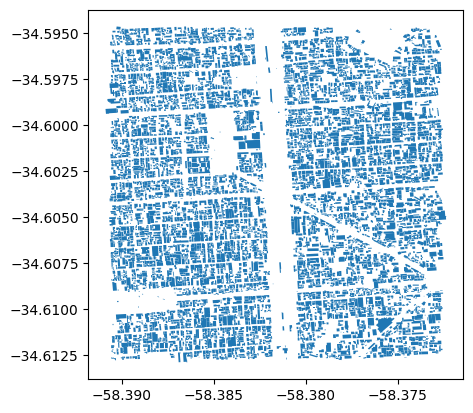

In [6]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [7]:
long_area_center, lat_area_center = tools.get_area_center(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.38159822, -34.603723405


In [8]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP,-0.006033,0.008866,98,-68,1
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG,0.000412,-0.006692,-75,4,1
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2,-0.002949,-0.001865,-21,-33,2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359,-0.002518,0.001844,20,-29,2
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33,0.001102,0.003393,37,12,1
...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9,-0.008968,0.003314,36,-100,1
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64,0.005499,-0.006383,-72,61,2
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q,0.002891,0.001341,14,32,1
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936,-0.007895,-0.007491,-84,-88,1


In [9]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:02<00:00, 78.84it/s]


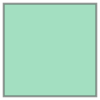

In [10]:
poly_grid[0][0]

In [11]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 7906/7906 [00:05<00:00, 1400.85it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells,overlapping
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP,-0.006033,0.008866,98,-68,1,"[{'cell_long_pos': 98, 'cell_lat_pos': -69, 'a..."
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG,0.000412,-0.006692,-75,4,1,"[{'cell_long_pos': -75, 'cell_lat_pos': 4, 'ar..."
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2,-0.002949,-0.001865,-21,-33,2,"[{'cell_long_pos': -22, 'cell_lat_pos': -35, '..."
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359,-0.002518,0.001844,20,-29,2,"[{'cell_long_pos': 19, 'cell_lat_pos': -29, 'a..."
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33,0.001102,0.003393,37,12,1,"[{'cell_long_pos': 37, 'cell_lat_pos': 11, 'ar..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9,-0.008968,0.003314,36,-100,1,"[{'cell_long_pos': 36, 'cell_lat_pos': -100, '..."
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64,0.005499,-0.006383,-72,61,2,"[{'cell_long_pos': -73, 'cell_lat_pos': 61, 'a..."
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q,0.002891,0.001341,14,32,1,"[{'cell_long_pos': 14, 'cell_lat_pos': 31, 'ar..."
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936,-0.007895,-0.007491,-84,-88,1,"[{'cell_long_pos': -85, 'cell_lat_pos': -89, '..."


In [12]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [13]:
intersections = tools.build_intersections_df(subset)
intersections

,cell_long_pos,cell_lat_pos,area,polygon_tag,fraction_of_the_building,fraction_over_buildings_in_cell
0,98,-69,2.832116e-10,48Q39JRG+3WRP,0.021012,0.049180
1,98,-68,6.153561e-09,48Q39JRG+3WRP,0.456543,1.000000
2,98,-67,4.677447e-09,48Q39JRG+3WRP,0.347028,1.000000
3,99,-69,5.380105e-11,48Q39JRG+3WRP,0.003992,0.009282
4,99,-68,1.472139e-09,48Q39JRG+3WRP,0.109220,1.000000
...,...,...,...,...,...,...
46391,-83,-88,9.495031e-10,48Q39JQ6+9936,0.125503,0.191591
46392,-63,-51,9.217616e-10,48Q39JR7+P483,0.462732,0.467609
46393,-63,-50,3.454323e-10,48Q39JR7+P483,0.173410,0.105355
46394,-62,-51,5.233610e-10,48Q39JR7+P483,0.262732,0.528682


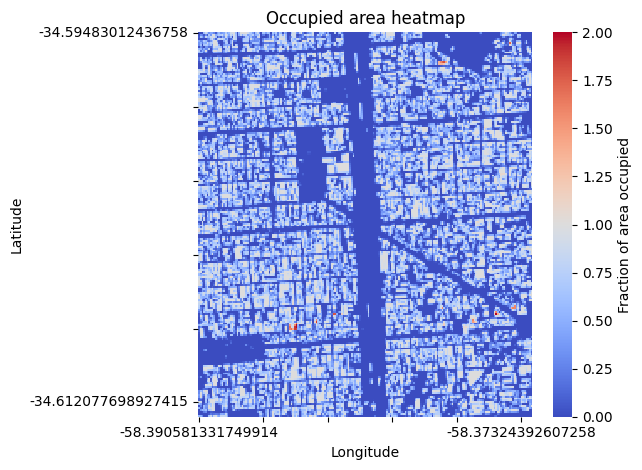

In [14]:
tools.plot_occupied_area_heatmap(intersections, lat_area_center=lat_area_center, long_area_center=long_area_center, save_as="test.png")

In [15]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

cell_composition
cell_long_pos cell_lat_pos                                                   
-100          -100          [{'polygon_tag': '48Q39JP5+WR8V', 'fraction_ov...
              -96           [{'polygon_tag': '48Q39JQ5+3QHV', 'fraction_ov...
              -95           [{'polygon_tag': '48Q39JQ5+4R6G', 'fraction_ov...
              -94           [{'polygon_tag': '48Q39JQ5+5Q5X', 'fraction_ov...
              -93           [{'polygon_tag': '48Q39JQ5+5Q5X', 'fraction_ov...
...                                                                       ...
 99            86           [{'polygon_tag': '48Q3CJ3G+JWX2', 'fraction_ov...
               87           [{'polygon_tag': '48Q3CJ3G+JWX2', 'fraction_ov...
               88           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...
               89           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...
               90           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...

[28927 rows x 1 columns]

In [16]:
if -25 in cell_composition.index:
    if -25 in cell_composition.columns:
        cell_composition.loc[-25,-25].values 

In [17]:
cell_composition = tools.add_orientation_to_cells(cell_composition, subset)
cell_composition

100%|██████████| 28927/28927 [00:42<00:00, 681.53it/s]


cell_composition  \
cell_long_pos cell_lat_pos                                                      
-100          -100          [{'polygon_tag': '48Q39JP5+WR8V', 'fraction_ov...   
              -96           [{'polygon_tag': '48Q39JQ5+3QHV', 'fraction_ov...   
              -95           [{'polygon_tag': '48Q39JQ5+4R6G', 'fraction_ov...   
              -94           [{'polygon_tag': '48Q39JQ5+5Q5X', 'fraction_ov...   
              -93           [{'polygon_tag': '48Q39JQ5+5Q5X', 'fraction_ov...   
...                                                                       ...   
 99            86           [{'polygon_tag': '48Q3CJ3G+JWX2', 'fraction_ov...   
               87           [{'polygon_tag': '48Q3CJ3G+JWX2', 'fraction_ov...   
               88           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...   
               89           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...   
               90           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...   

                            orientation_angle  eccentricity  
cell_long_pos cell_lat_pos                                   
-100          -100                 167.323724      0.902924  
              -96                    1.891599      0.531111  
              -95                   92.426880      0.877394  
              -94                    1.659430      0.894965  
              -93                    1.659436      0.849066  
...                                       ...           ...  
 99            86                    5.218823      0.847851  
               87                    5.218823      0.847851  
               88                  112.080185      0.923890  
               89                  112.080185      0.923890  
               90                  112.080185      0.923890  

[28927 rows x 3 columns]

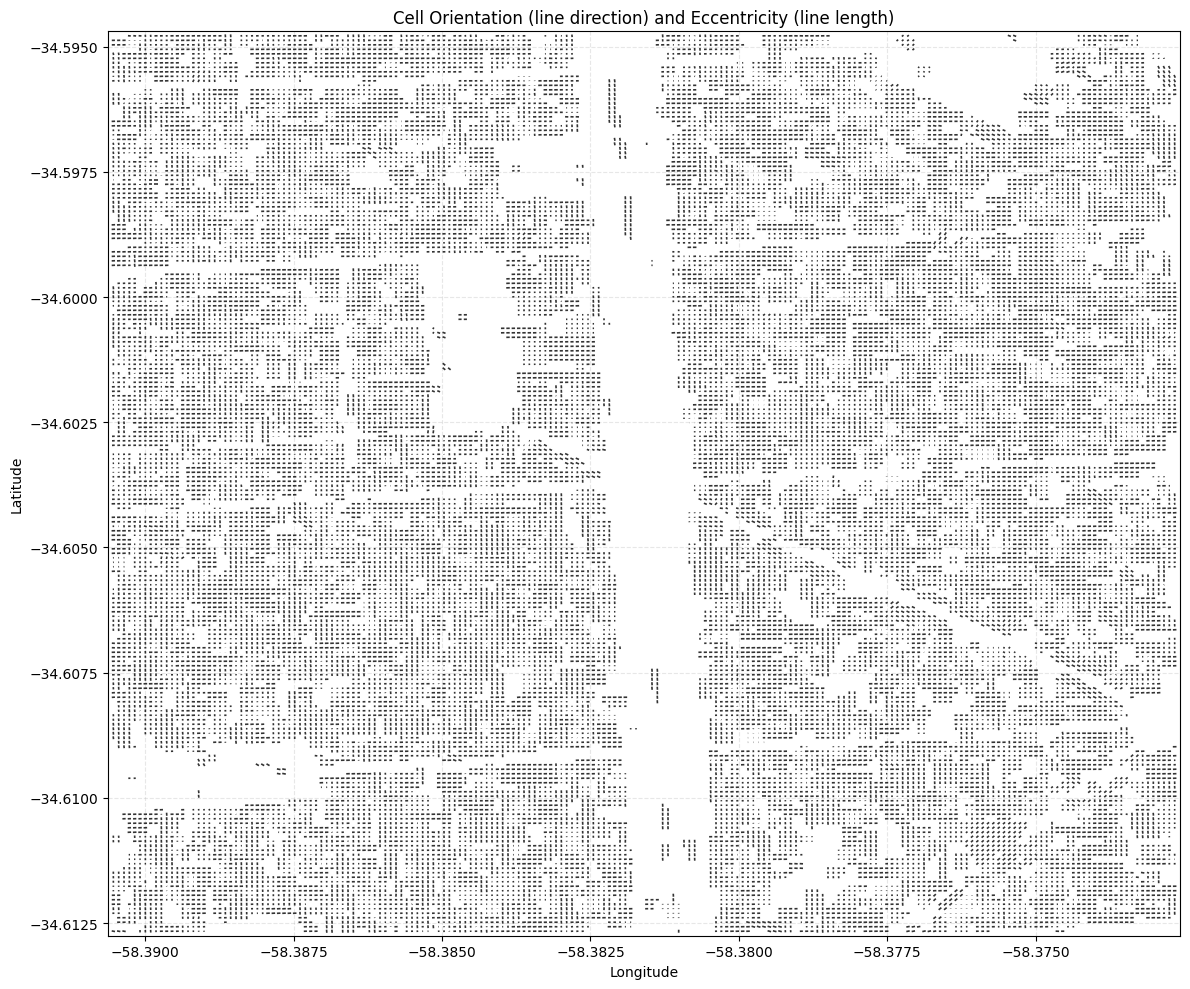

In [18]:
tools.plot_orientation_lines(cell_composition, lat_area_center=lat_area_center, long_area_center=long_area_center, save_as="test_orientation.png")